<a href="https://colab.research.google.com/github/JL-plusUltra/DataScience/blob/main/Churn_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
################## Packs for EDA #########################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

##############Stats Packs################
from scipy.stats import iqr 
from scipy import stats

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
print(data.shape)
data.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#################### find missing data #################### there is none ##################
M_count= (data.isnull().sum())
print(M_count[M_count>0])
print(M_count[M_count>0]/data.shape[0])

Series([], dtype: int64)
Series([], dtype: float64)


In [4]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
################ Create dummies for Gender #####################
data[['is_Female','is_male']] = pd.get_dummies(data['Gender'])

############### is_Female to int type #################
data['is_Female']=data['is_Female'].astype(int)

################# impute missing data just in case it lies to me ####################
data['EstimatedSalary']=data['EstimatedSalary'].fillna(data['EstimatedSalary'].median())
data['Balance']=data['Balance'].fillna(data['Balance'].median())
data['CreditScore']=data['CreditScore'].fillna(data['CreditScore'].median())
data['Exited']= data['Exited'].fillna(data['Exited'].mean())

################# Drop is_male column since is_Female shows its info #########################
data = data.drop(['is_male'], axis=1)


In [6]:
################################## Log Regression Classifies better with outliers ##########################3
########################## Find outliers w/ Z score #################################
#data['z_score_salary']=stats.zscore(data['EstimatedSalary'])
#data['z_score_balance']=stats.zscore(data['Balance'])
#data['z_score_credit']=stats.zscore(data['CreditScore'])

#eliminate outliers beyond three standard deviations
#data = data[(np.abs(stats.zscore(data['EstimatedSalary'])) < 3)]
#data = data[(np.abs(stats.zscore(data['Balance'])) < 3)]
#data = data[(np.abs(stats.zscore(data['CreditScore'])) < 3)]

In [7]:
##################### normalize columns used ###################
data['CreditScore']= data['CreditScore']/data['CreditScore'].max()
data['EstimatedSalary']=(data['EstimatedSalary']/data['EstimatedSalary'].max())
data['Balance']=(data['Balance']/data['Balance'].max())
data['Age']=data['Age']/data['Age'].max()


In [8]:
print(data.shape)
data.describe()

(10000, 15)


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,is_Female
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,0.765328,0.423063,5.012800,0.304848,1.530200,0.70550,0.515100,0.500470,0.203700,0.454300
std,2886.89568,7.193619e+04,0.113710,0.113998,2.892174,0.248696,0.581654,0.45584,0.499797,0.287563,0.402769,0.497932
min,1.00000,1.556570e+07,0.411765,0.195652,0.000000,0.000000,1.000000,0.00000,0.000000,0.000058,0.000000,0.000000
25%,2500.75000,1.562853e+07,0.687059,0.347826,3.000000,0.000000,1.000000,0.00000,0.000000,0.255020,0.000000,0.000000
50%,5000.50000,1.569074e+07,0.767059,0.402174,5.000000,0.387402,1.000000,1.00000,1.000000,0.500988,0.000000,0.000000
75%,7500.25000,1.575323e+07,0.844706,0.478261,7.000000,0.508749,2.000000,1.00000,1.000000,0.746969,0.000000,1.000000
max,10000.00000,1.581569e+07,1.000000,1.000000,10.000000,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [9]:
################################# Check correlation between variables ###########################
Xcor=data
corM = Xcor.corr(method ='pearson')
corM

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,is_Female
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571,-0.018196
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,0.002641
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.002857
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.027544
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.014733
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.012087
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.021859
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.005766
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.022544
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.008112


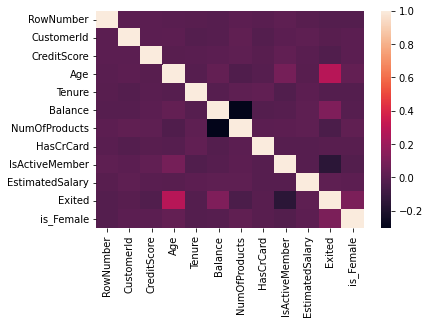

In [10]:
sn.heatmap(Xcor.corr(), annot = False, fmt='.5g')

In [11]:
############################# Check for Uniqueness #####################
len(data['CustomerId'].unique())

10000

In [12]:
########################## Split Training and Test data ##########################
#train_data = data.sample(frac=0.85)
#test_data = data.loc[~data.index.isin(train_data.index)]

In [13]:
############################# Load the splitted data so it's not random ###################
train_data = pd.read_csv('/content/drive/MyDrive/Churn_train(82).csv')
test_data = pd.read_csv('/content/drive/MyDrive/Churn_test(82).csv')

In [14]:
print(train_data.shape,test_data.shape)

(8500, 16) (1500, 16)


In [15]:
######################## Function definitions###############################
def sigmoid(h):
  return 1/(1+np.exp(-h))

def cross_entropy(y,p_hat):
  return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

def accuracy(y, y_hat):
  return np.mean(y==y_hat)


In [16]:
class LogisticRegression():
  def __init__(self, thresh=.35):
    self.thresh=thresh
    self.W=None
    self.B=None

  def fit(self,X,y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs= int(epochs)
    N,D= X.shape

    self.W= np.random.randn(D)
    self.B= np.random.randn(1)

    J= np.zeros(int(epochs))

    for epoch in range(epochs):
      p_hat=self.__forward__(X)
      J[epoch]= cross_entropy(y,p_hat)

      self.W -= eta* (1/N)*X.T@(p_hat-y)
      self.B -= eta*(1/N)*np.sum(p_hat-y)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()
    
  def __forward__(self,X):
    return sigmoid(X@self.W+self.B)

  def predict(self, X):
    return (self.__forward__(X)>=self.thresh).astype(np.int32)  

In [17]:
    #log_reg = LogisticRegression()
    #log_reg.fit(X, y, eta = 1e-1, show_curve = True)
    #y_hat = log_reg.predict(X)

In [18]:
X_train = train_data[['Age', 'is_Female', 'Balance','CreditScore']].copy()
X_train.shape

(8500, 4)

In [19]:
y_train=train_data['Exited'].copy()
y_train.shape

(8500,)

In [20]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()

In [21]:
log_reg = LogisticRegression()

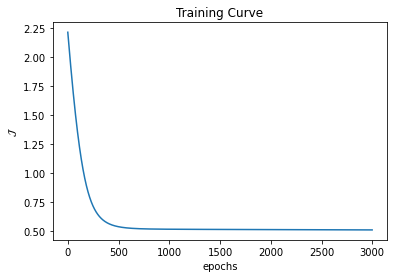

In [22]:
log_reg.fit(X_train, y_train, eta = 1e-2, epochs=3e3 , show_curve = True)

In [23]:
y_hat = log_reg.predict(X_train)

In [24]:
accuracy(y_train,y_hat)

0.7928235294117647

In [25]:
y_test = test_data['Exited'].copy()

In [26]:
X_test = test_data[['Age', 'is_Female', 'Balance','CreditScore']].copy()

In [27]:
y_test = y_test.to_numpy()
X_test = X_test.to_numpy()

In [28]:
y_hat_test = log_reg.predict(X_test)

In [39]:
percent =[]
for i in range(len(y_hat_test)):
  if y_hat_test[i]== 1:
    percent.append(y_hat_test[i])


In [41]:
len(percent)

2

In [29]:
################################ Log Regression accuracy #################
accuracy(y_test, y_hat_test)

0.818

In [30]:
def softmax(h):
  return (np.exp(h.T)/np.sum(np.exp(h), axis=1)).T

def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat),axis=1),axis=0)

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

def indices_to_one_hot(data, nb_classes):
  targets = np.array(data).reshape(-1)
  return np.eye(nb_classes)[targets]
  

In [31]:
class MVLogisticRegression():

  def __init__(self,thresh=0.35):
    self.thresh = thresh


  def fit(self, X, y, eta=2e-1, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N,D = X.shape
    K= len(np.unique(y))
    y_values= np.unique(y, return_index=False)
    Y= indices_to_one_hot(y, K).astype(int)

    self.W = np.random.randn(D,K)
    self.B = np.random.randn(1,K)

    J= np.zeros(int(epochs))

    for epoch in range(epochs):
      P_hat= self.__forward__(X)
      J[epoch]=cross_entropy(Y, P_hat)

      self.W -=  eta*(1/N)*X.T@(P_hat-Y)
      self.B -= eta*(1/N)*np.sum(P_hat-Y,axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self, X):
    return sigmoid(X@self.W+self.B)
    #return softmax(X@self.W + self.B)
    

  def predict(self, X):
    return np.argmax(self.__forward__(X), axis=1)
  

In [32]:
logreg_GD = MVLogisticRegression()

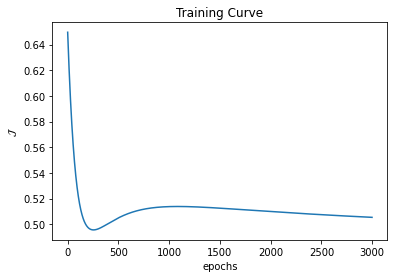

In [33]:
logreg_GD.fit(X_train, y_train,eta = 1e-2, epochs=3e3, show_curve=True)

In [34]:
y_hat_GD =logreg_GD.predict(X_train)

In [35]:
accuracy(y_train, y_hat_GD)

0.7927058823529411

In [36]:
y_g = logreg_GD.predict(X_test)

In [37]:
accuracy(y_test, y_g)

0.8166666666666667